In [ ]:
!pip install statsmodels

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
!pip install scikit-image

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
import pandas as pd
import Config
import skimage.io as sk
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
import numpy as np 
from statsmodels.robust import mad
from PIL import Image 

## Reading images

#### Making a dataframe from features.csv to get the files id's

In [ ]:
img_features_df = pd.read_csv(Config.features_path)
#img_features_df = img_features_df.drop(['area', 'perimeter'], axis=1) #we only need the id
mel_df = pd.read_csv(Config.example_ground_truth_path)

img_features_df['melanoma'] = mel_df['melanoma']
#print(img_features_df[img_features_df['melanoma'] == 1]) #getting the images that show cancer lesions

#### Main function that check's each image color

In [ ]:
def check_channel_variability(arr):
    pass

def check_variability(img, img_bw):
    les_size = np.size(img)
    variability_score = 0
    white_val_x, white_val_y = np.where(img_bw == 255)

    gray_list = [0]*np.size(white_val_x)
    lesion = img[white_val_x][white_val_y]

    print(lesion)
    
    #for x in range(np.size(white_val_x)):
    #    gray_list[x] = rgb2gray(img[white_val_x[x]][white_val_y[x]])
        #print(rgb2gray(img[white_val_x[x]][white_val_y[x]]))

    #gray_list = rgb2gray(img[white_val_x][white_val_y])


    #print(mad(gray_list))
    #ax.hist(gray_list, bins=bins);
    
    #ax.set_title(f'{str(title)}, var: {np.var(gray_list)}')'''

img = plt.imread(f'../data/example_image/ISIC_0012965.jpg') 
img_bw = sk.imread(f'../data/example_segmentation/ISIC_0012965_segmentation.png', as_gray=True) 
check_variability(img, img_bw)

def check_variability2(img1, img2, area, id):
    #with paste we are cutting the original image using the segmentation as a mask
    img2.paste(img1, (0,0), mask = img2) 
    #it then returns a single channel image 
    #we then convert the image into an array
    arr= np.array(img2)
    ind= np.where(arr != 0)
    
    print((mad(arr[ind])/area)*100, id)
    return (mad(arr[ind])/area)*1000

[[[210 195 190]
  [208 195 189]
  [208 195 189]
  ...
  [209 190 194]
  [209 190 194]
  [208 189 193]]

 [[210 195 190]
  [208 195 189]
  [208 195 189]
  ...
  [209 190 194]
  [209 190 194]
  [208 189 193]]

 [[210 195 190]
  [208 195 189]
  [208 195 189]
  ...
  [209 190 194]
  [209 190 194]
  [208 189 193]]

 ...

 [[211 193 189]
  [210 195 190]
  [206 191 186]
  ...
  [209 190 194]
  [209 190 194]
  [209 190 194]]

 [[211 193 189]
  [210 195 190]
  [206 191 186]
  ...
  [209 190 194]
  [209 190 194]
  [209 190 194]]

 [[211 193 189]
  [210 195 190]
  [206 191 186]
  ...
  [209 190 194]
  [209 190 194]
  [209 190 194]]]


#### Looping through the chosen range of images and applying check_variability()

In [ ]:
#M,N is the range of images that we choosen (finally it will be 0-# of images)
M = 0
N = 150

#fig, ax = plt.subplots(N-M, 1, figsize=(N-M, 2*(N-M)))
#fig.tight_layout()

mad_lst = []



#the main for loop which loads the images
for (index, id) in enumerate(img_features_df['id'][M:N]):
    #img = plt.imread(f'../data/example_image/{id}.jpg') #main image
    #img_bw = sk.imread(f'../data/example_segmentation/{id}_segmentation.png', as_gray=True) #main image grayed

    title = f"{id}: {img_features_df[img_features_df['id'] == id]['melanoma'].iloc[0]}"
    is_mel = img_features_df[img_features_df['id'] == id]['melanoma'].iloc[0]

    # Show the images overlayed, for this we can use PIL 

    # Load images as Image objects  
    img = Image.open(f'../data/example_image/{id}.jpg') 
    img_bw = Image.open(f'../data/example_segmentation/{id}_segmentation.png') 

    area = img_features_df[img_features_df['id'] == id]['perimeter'].iloc[0]

    mad_lst.append((check_variability2(img,img_bw, area, id), is_mel, id))    

0.8838165236993156 ISIC_0001769
1.9451049513921892 ISIC_0001852
0.7757802306133964 ISIC_0001871
2.537191296549765 ISIC_0003462
1.293593792200719 ISIC_0003539
0.6652169236144037 ISIC_0003582
0.5697446612532202 ISIC_0003657
1.5727746306636512 ISIC_0003805
1.1751140437296712 ISIC_0004337
1.331259080888773 ISIC_0006651
0.654570515896513 ISIC_0006671
0.6820481741256363 ISIC_0006815
0.561398430415202 ISIC_0006914
1.0743494336997117 ISIC_0007141
2.129542562489473 ISIC_0007156
1.0103817127548935 ISIC_0007235
1.429920921401342 ISIC_0007241
1.1801190679349156 ISIC_0007332
1.016641521260984 ISIC_0007344
1.3717214049396471 ISIC_0007528
1.597812941100762 ISIC_0007796
0.6186883309393634 ISIC_0008025
0.46228131534695827 ISIC_0008524
0.7354177671158739 ISIC_0009995
0.6689345530583108 ISIC_0010459
3.6161029719648825 ISIC_0012099
2.1409418317770426 ISIC_0012109
2.819528783211921 ISIC_0012126
2.4194777817861137 ISIC_0012127
0.22519114767504872 ISIC_0012143
0.3506153895114599 ISIC_0012151
0.20721205010560

<AxesSubplot:>

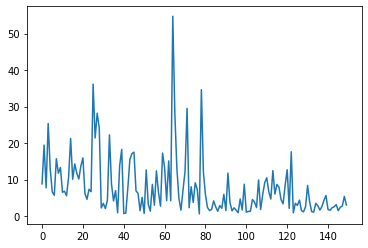

In [ ]:

mad_data= pd.DataFrame(mad_lst, columns=['mad','melanoma', 'id'])

mad_data['mad'].plot()




In [ ]:
from scipy.stats import pearsonr, spearmanr

mad_data['mad'] = mad_data['mad']*1000
print(spearmanr(mad_data['melanoma'], mad_data['mad']))

SpearmanrResult(correlation=-0.27020593062369996, pvalue=0.0008255705539516937)


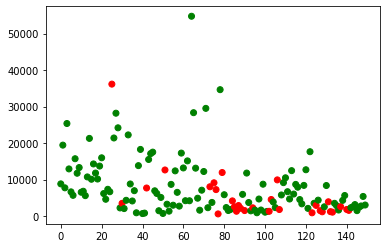

In [ ]:
colors = ["green" if img_features_df['melanoma'][x] == 0.0 else 'red' for x in range(len(img_features_df['melanoma'])) ]
plt.scatter([x for x in range(len(mad_data['mad']))], mad_data['mad'], c=colors)

In [ ]:
mad_data

,mad,melanoma,id
0,0.082306,0.0,ISIC_0001769
1,0.204508,0.0,ISIC_0001852
2,0.065053,0.0,ISIC_0001871
3,0.210877,0.0,ISIC_0003462
4,0.084175,0.0,ISIC_0003539
...,...,...,...
145,0.002133,0.0,ISIC_0015443
146,0.003937,0.0,ISIC_0015445
147,0.004352,0.0,ISIC_0015483
148,0.008281,0.0,ISIC_0015496


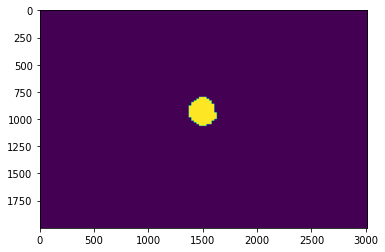

In [ ]:
img = Image.open(f'../data/example_image/ISIC_0012965.jpg') 
img_bw = Image.open(f'../data/example_segmentation/ISIC_0012965_segmentation.png') 
plt.imshow(img_bw)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=932aa97b-f6d2-4889-8f04-d6166675cc2f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>